<a href="https://colab.research.google.com/github/Jayasurya227/Smart-Segmentation-Unlocking-Customer-Personas-with-AI/blob/main/Smart_Segmentation_Unlocking_Customer_Personas_with_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.cluster.hierarchy as sch

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#set plot style
sns.set_style('whitegrid')

In [ ]:
!git clone 'https://github.com/GeeksforgeeksDS/21-Days-21-Projects-Dataset'

Cloning into '21-Days-21-Projects-Dataset'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 22 (delta 3), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (22/22), 1.40 MiB | 5.66 MiB/s, done.
Resolving deltas: 100% (3/3), done.


In [ ]:
df=pd.read_csv("/content/Mall_Customers.csv")
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


**Step 2:In-Depth Explotaryh Data Analysis(EDA)**

In [ ]:
df.shape

(200, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


**2.1 Univariate Analyss(Feature Distrubution)**

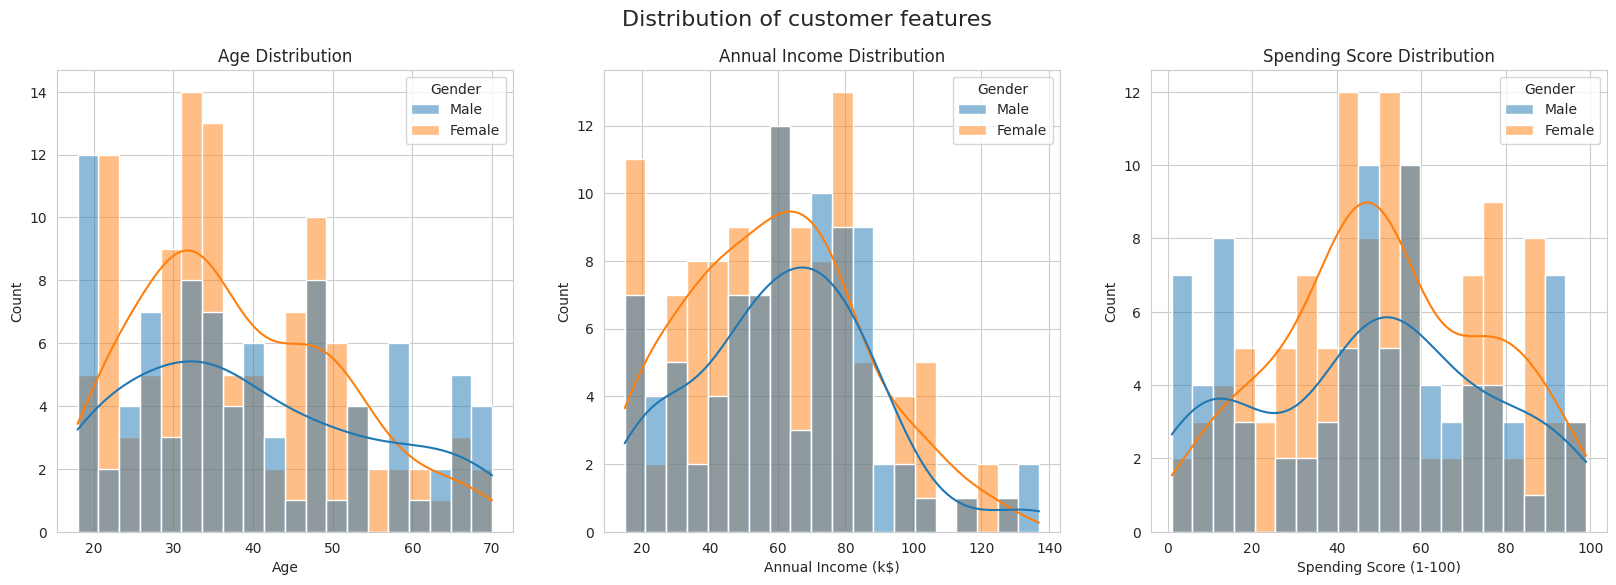

In [ ]:
fig,axes=plt.subplots(1,3,figsize=(20,6))
fig.suptitle("Distribution of customer features",fontsize=16)

sns.histplot(ax=axes[0],data=df,x='Age',kde=True,bins=20,hue='Gender').set_title("Age Distribution")
sns.histplot(ax=axes[1],data=df,x='Annual Income (k$)',kde=True,bins=20,hue='Gender').set_title("Annual Income Distribution")
sns.histplot(ax=axes[2],data=df,x='Spending Score (1-100)',kde=True,bins=20,hue='Gender').set_title("Spending Score Distribution")

plt.show()

**2.2 Bivariate Analysis(Looking For Relationship)**

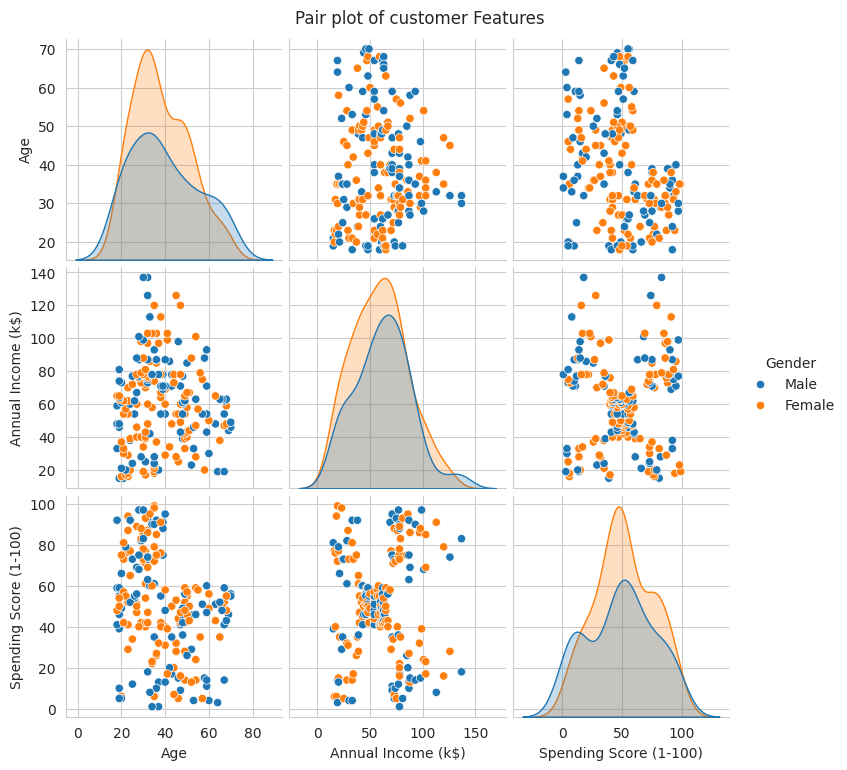

In [ ]:
sns.pairplot(df,vars=['Age','Annual Income (k$)','Spending Score (1-100)'],hue='Gender',diag_kind='kde')
plt.suptitle('Pair plot of customer Features',y=1.02)
plt.show()

**2.3 3D Visualization**

In [ ]:
fig=px.scatter_3d(df,
                  x='Annual Income (k$)',
                  y='Spending Score (1-100)',
                  z='Age',
                  color='Gender',
                  title='3D Visualization of Customer Features')
fig.show()

**Step 3: Segmentation Model 1- Income&Spending Score**

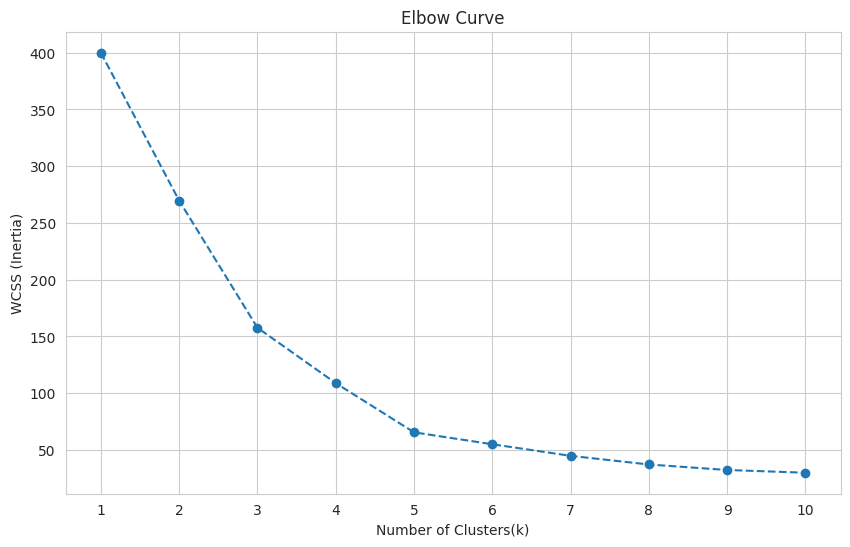

In [ ]:
#1.select and acle the features
X1=df[['Annual Income (k$)','Spending Score (1-100)']]
scaler=StandardScaler()
X1_scaled=scaler.fit_transform(X1)

#2.Implementing the elbow Method
wcss1=[]
for k in range(1,11):
  Kmeans=KMeans(n_clusters=k,init='k-means++',random_state=42,n_init=10)
  Kmeans.fit(X1_scaled)
  wcss1.append(Kmeans.inertia_)

#Plot the Elbow Curve
plt.figure(figsize=(10,6))
plt.plot(range(1,11),wcss1,marker='o',linestyle='--')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters(k)')
plt.ylabel("WCSS (Inertia)")
plt.xticks(range(1,11))
plt.show()

In [ ]:
# Build and fit final model
Kmeans1=KMeans(n_clusters=5,init='k-means++',random_state=42,n_init=10)
df['Income_Cluster']=Kmeans1.fit_predict(X1_scaled)

**3.1 Visualizing and Interpreting the Income-Based Segments**

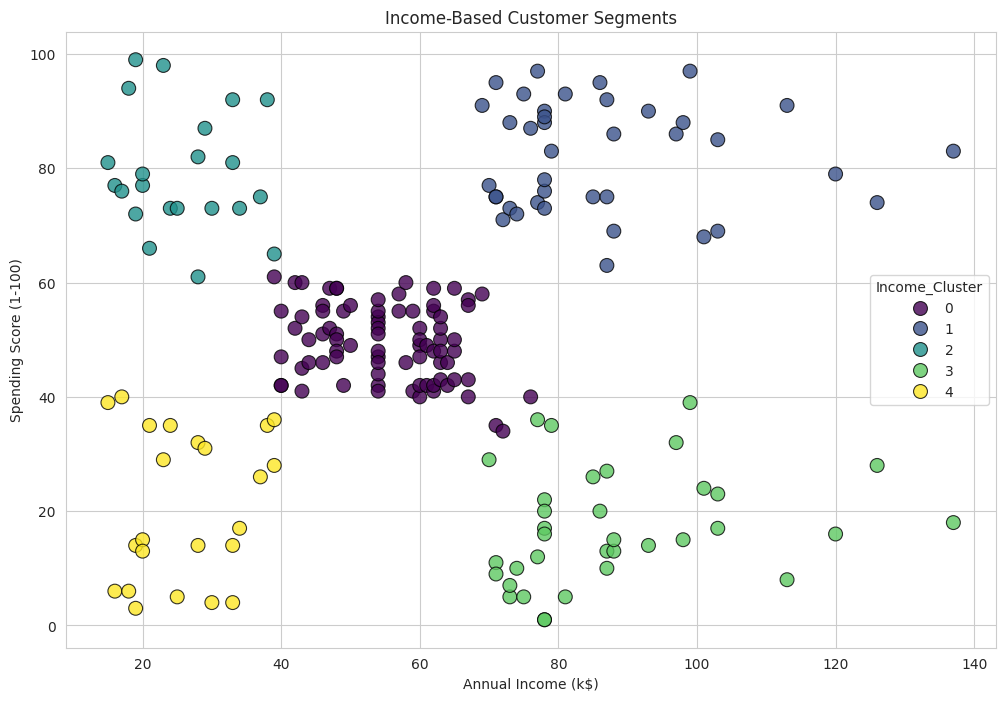

In [ ]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df,x='Annual Income (k$)',y='Spending Score (1-100)',hue='Income_Cluster',palette='viridis',s=100,alpha=0.8,edgecolor='black')
plt.title('Income-Based Customer Segments')
plt.show()

In [ ]:
# Quantiatave persona Annalysis
cluster_profiles1=df.groupby('Income_Cluster').agg({
    'Age':'mean',
    'Annual Income (k$)':'mean',
    'Spending Score (1-100)':'mean'
})
cluster_profiles1['size']=df['Income_Cluster'].value_counts()
print("---Income -Based cluster profie---")
display(cluster_profiles1.round(2))

---Income -Based cluster profie---


,Age,Annual Income (k$),Spending Score (1-100),size
Income_Cluster,,,,
0,42.72,55.30,49.52,81
1,32.69,86.54,82.13,39
2,25.27,25.73,79.36,22
3,41.11,88.20,17.11,35
4,45.22,26.30,20.91,23


**Step 4 :Segmentation Model2- Age&Spending Score**

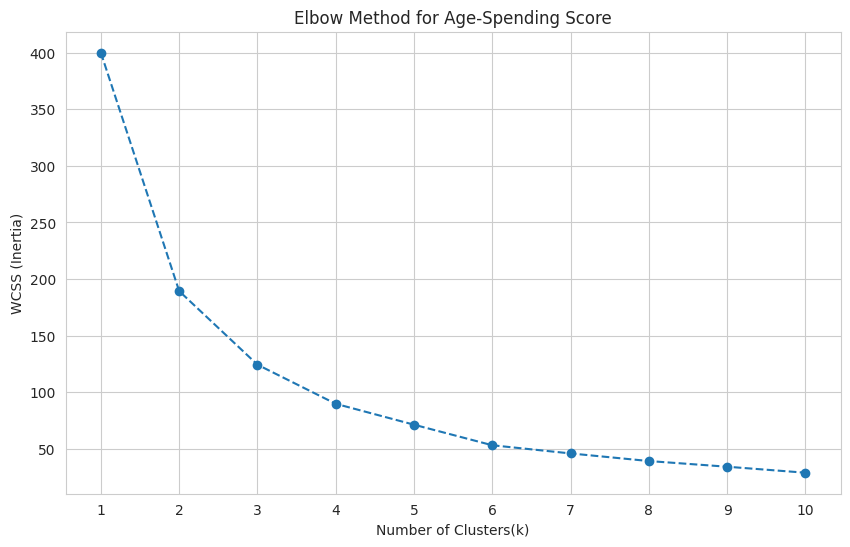

In [ ]:
# 1.Select and the features
X2=df[['Age','Spending Score (1-100)']]
scaler=StandardScaler()
X2_scaled=scaler.fit_transform(X2)

# 2. Implement the Elbow Method
wcss2=[]
for k in range(1,11):
  Kmeans=KMeans(n_clusters=k,init='k-means++',random_state=42,n_init=10)
  Kmeans.fit(X2_scaled)
  wcss2.append(Kmeans.inertia_)

  # 3.Plot the Elbow Curve
plt.figure(figsize=(10,6))
plt.plot(range(1,11),wcss2,marker='o',linestyle='--')
plt.title('Elbow Method for Age-Spending Score')
plt.xlabel('Number of Clusters(k)')
plt.ylabel("WCSS (Inertia)")
plt.xticks(range(1,11))
plt.show()

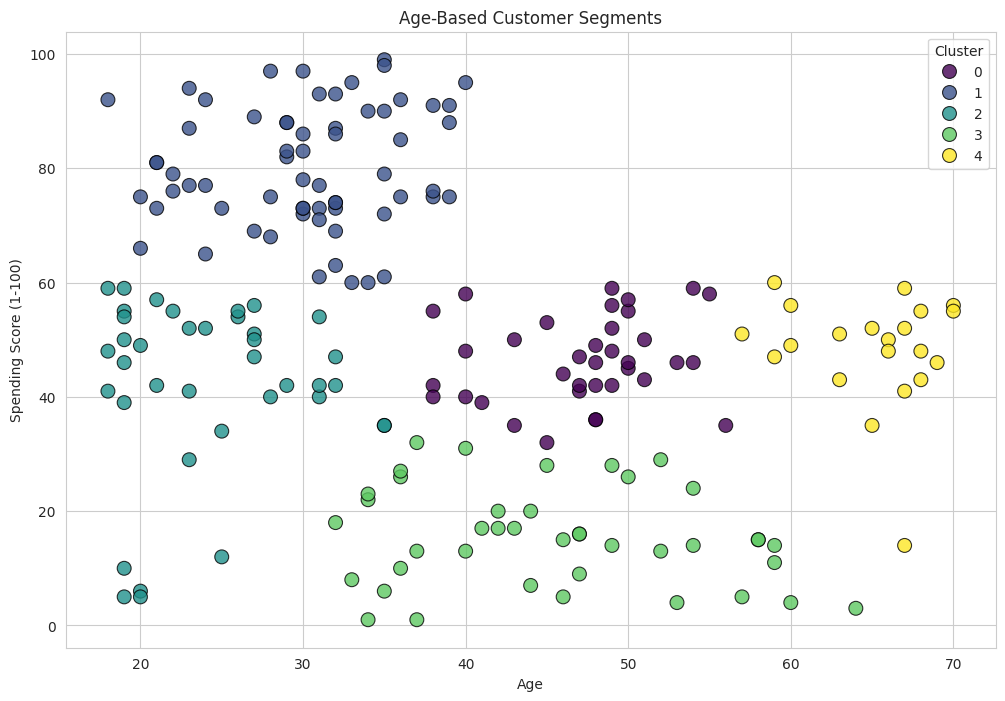

In [ ]:
# Build and fit the final model for age segmentation
Kmeans2=KMeans(n_clusters=5,init='k-means++',random_state=42,n_init=10)
df['Age_Cluster']=Kmeans2.fit_predict(X2_scaled)

#Visualize the new Clusters
plt.figure(figsize=(12,8))
sns.scatterplot(data=df,x='Age',y='Spending Score (1-100)',hue='Age_Cluster',palette='viridis',s=100,alpha=0.8,edgecolor='black')
plt.title('Age-Based Customer Segments')
plt.legend(title='Cluster')
plt.show()

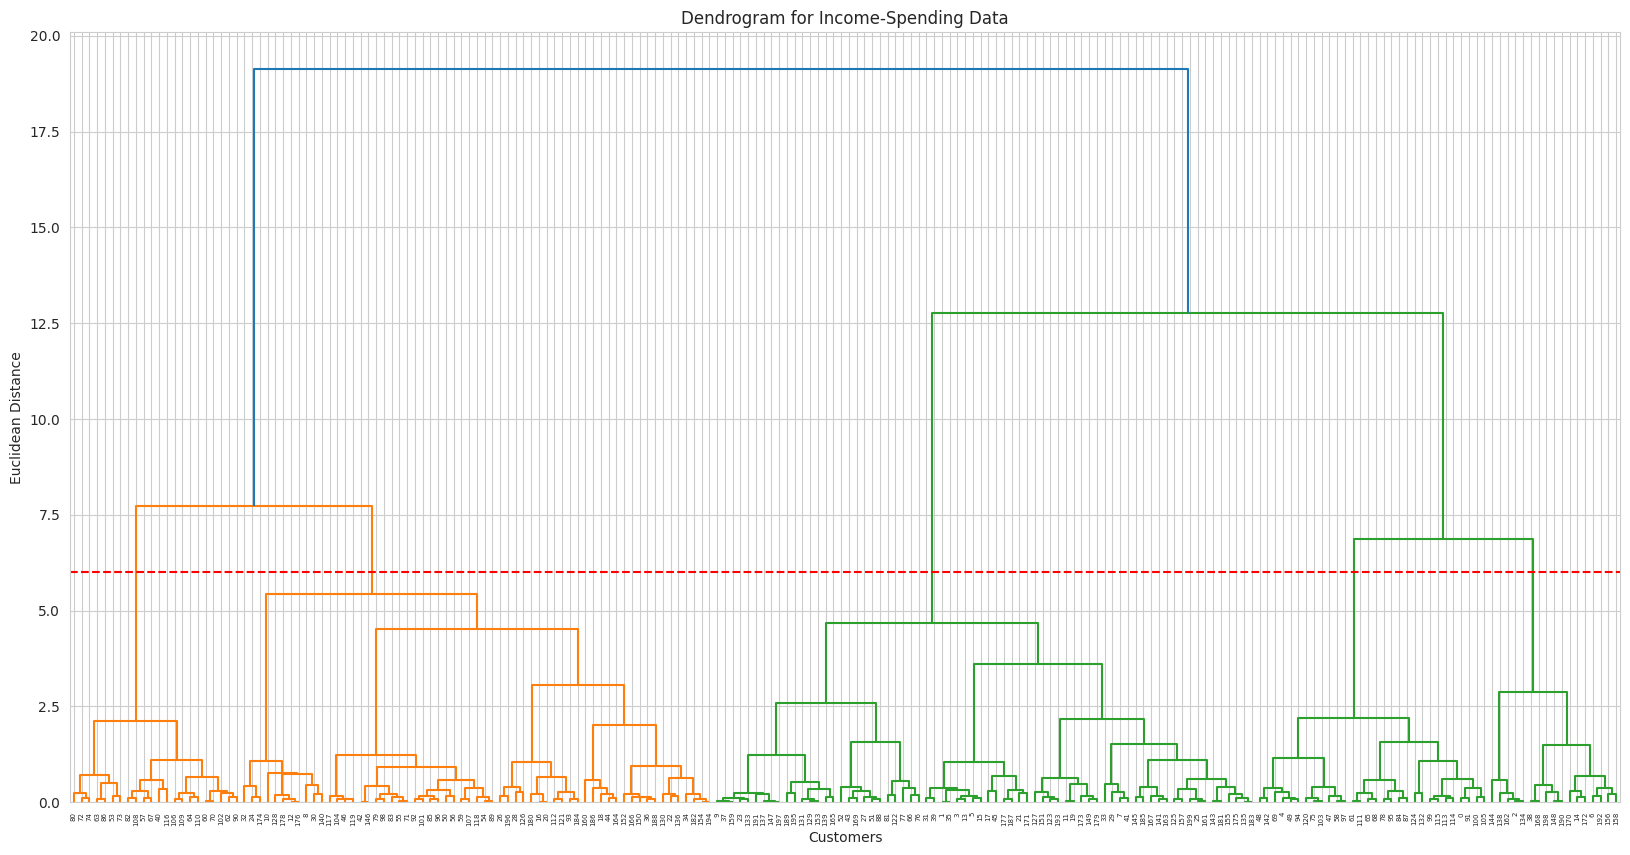

In [ ]:
plt.figure(figsize=(20,10))
dendrogram=sch.dendrogram(sch.linkage(X2_scaled,method='ward'))
plt.title('Dendrogram for Income-Spending Data')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distance')
plt.axhline(y=6,color='red',linestyle='--')
plt.show()

In [ ]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Income_Cluster,Age_Cluster
0,1,Male,19,15,39,4,2
1,2,Male,21,15,81,2,1
2,3,Female,20,16,6,4,2
3,4,Female,23,16,77,2,1
4,5,Female,31,17,40,4,2
